Task 1: This is an open ended problem. Apply Exploratory Data Analysis (Univariate and Bivariate) on the dataset available above.


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/dataset.csv')

# Preview the data
print(df.head())
print(df.info())
print(df.describe(include='all'))


   VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel

2. Univariate Analysis
For univariate analysis, we will examine each feature individually to understand its distribution.


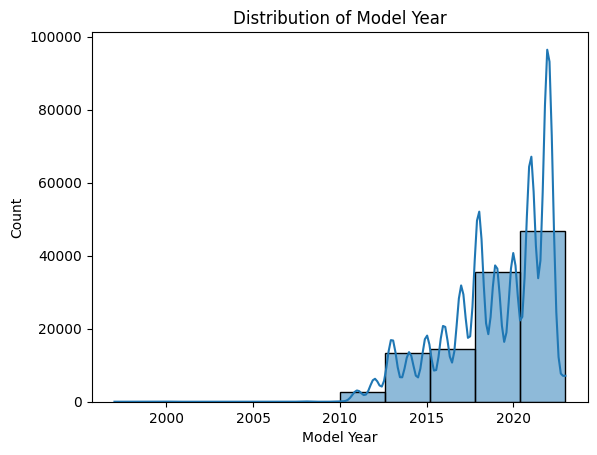

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model Year distribution
sns.histplot(df['Model Year'], bins=10, kde=True)
plt.title('Distribution of Model Year')
plt.show()


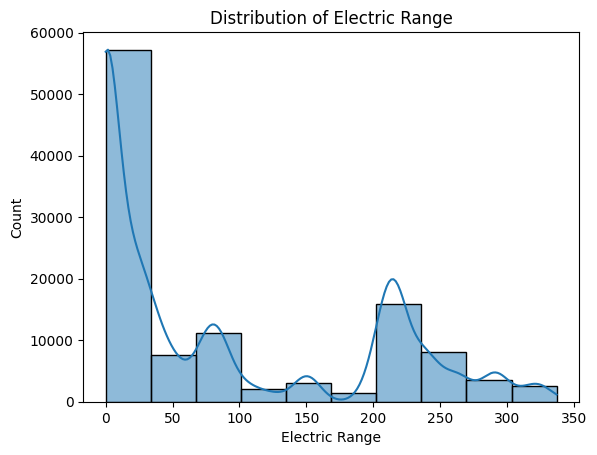

In [ ]:
# Electric Range distribution
sns.histplot(df['Electric Range'], bins=10, kde=True)
plt.title('Distribution of Electric Range')
plt.show()


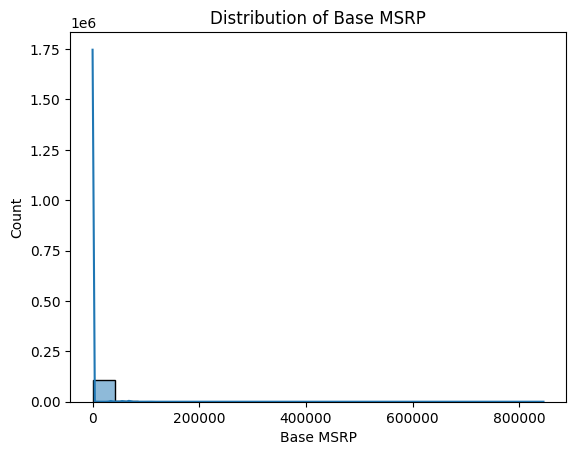

In [ ]:
# Base MSRP distribution
sns.histplot(df['Base MSRP'], bins=20, kde=True)
plt.title('Distribution of Base MSRP')
plt.show()


In [ ]:
# Unique counts of postal code and other identifiers
print(df['Postal Code'].nunique())
print(df['DOL Vehicle ID'].nunique())
print(df['Legislative District'].nunique())
print(df['2020 Census Tract'].nunique())


773
112634
49
2026


B. Categorical Variables
Make (e.g., Tesla, Nissan, Ford)
Check which car brands (Make) are more common.

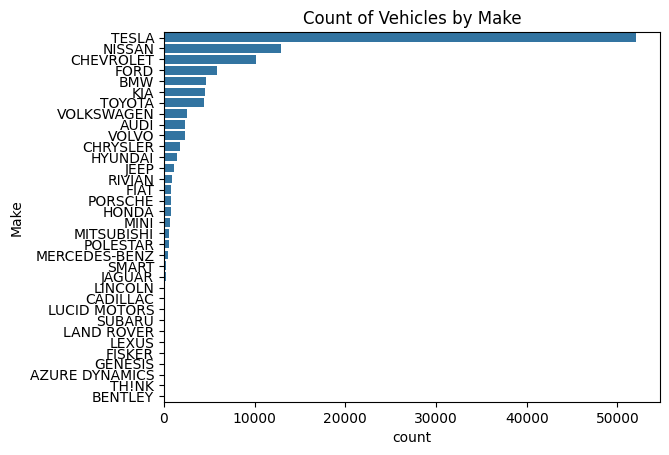

In [ ]:
# Bar plot for vehicle brands (Make)
sns.countplot(y='Make', data=df, order=df['Make'].value_counts().index)
plt.title('Count of Vehicles by Make')
plt.show()


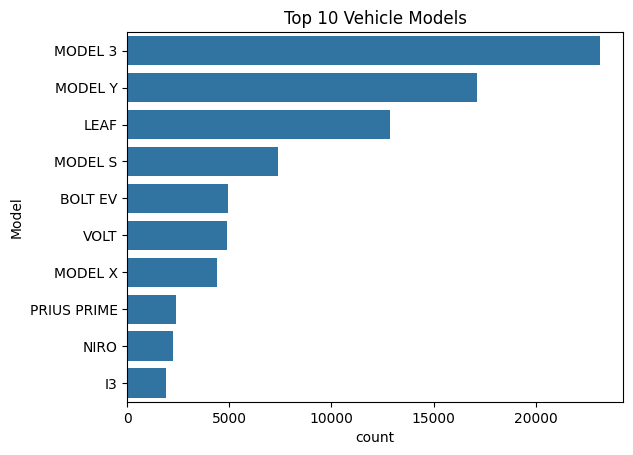

In [ ]:
# Bar plot for vehicle models
sns.countplot(y='Model', data=df, order=df['Model'].value_counts().index[:10])  # Top 10 models
plt.title('Top 10 Vehicle Models')
plt.show()


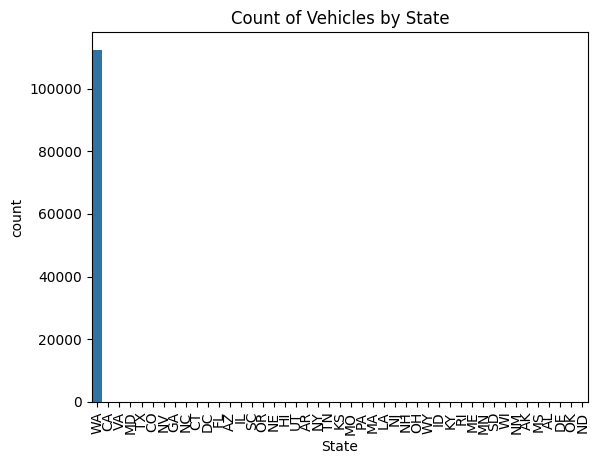

In [ ]:
# Bar plot for States
sns.countplot(x='State', data=df, order=df['State'].value_counts().index)
plt.title('Count of Vehicles by State')
plt.xticks(rotation=90)
plt.show()


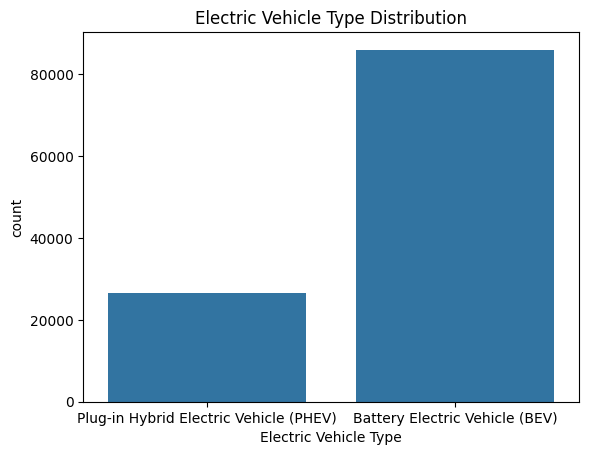

In [ ]:
# Bar plot for Electric Vehicle Type
sns.countplot(x='Electric Vehicle Type', data=df)
plt.title('Electric Vehicle Type Distribution')
plt.show()


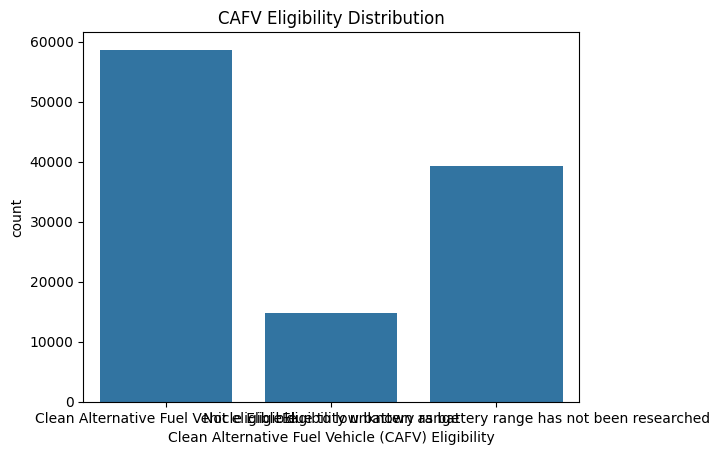

In [ ]:
# CAFV Eligibility count
sns.countplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', data=df)
plt.title('CAFV Eligibility Distribution')
plt.show()


3. Bivariate Analysis
Bivariate analysis looks at the relationships between two variables.

A. Numerical vs Numerical
Base MSRP vs Electric Range
Check the relationship between vehicle price and electric range.

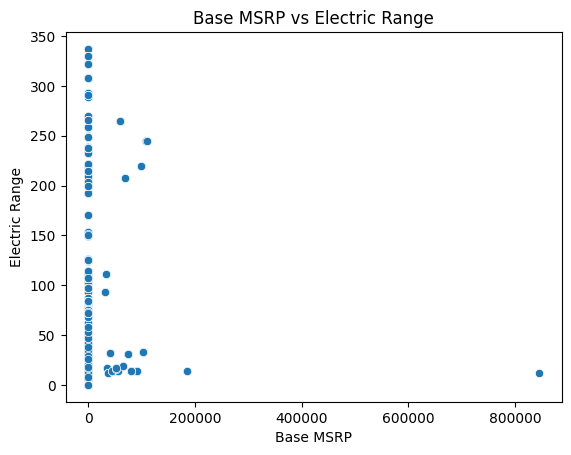

In [ ]:
# Scatter plot of Base MSRP vs Electric Range
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df)
plt.title('Base MSRP vs Electric Range')
plt.show()


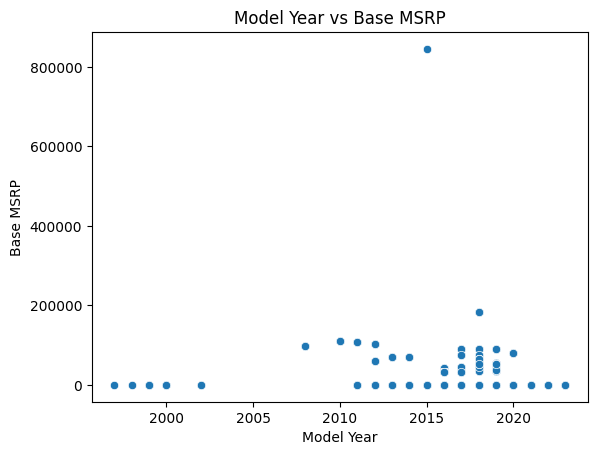

In [ ]:
# Scatter plot of Model Year vs Base MSRP
sns.scatterplot(x='Model Year', y='Base MSRP', data=df)
plt.title('Model Year vs Base MSRP')
plt.show()


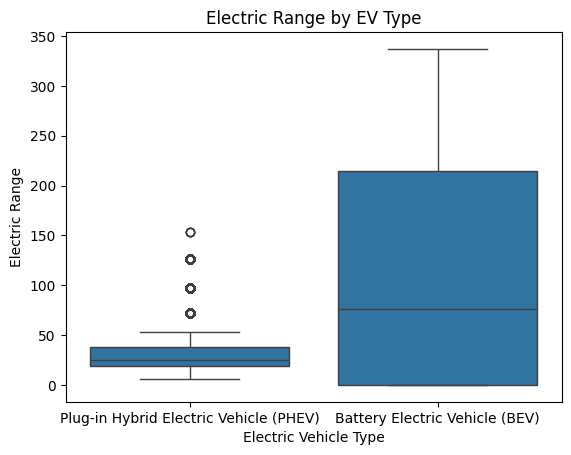

In [ ]:
# Box plot for Electric Range by Electric Vehicle Type
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df)
plt.title('Electric Range by EV Type')
plt.show()


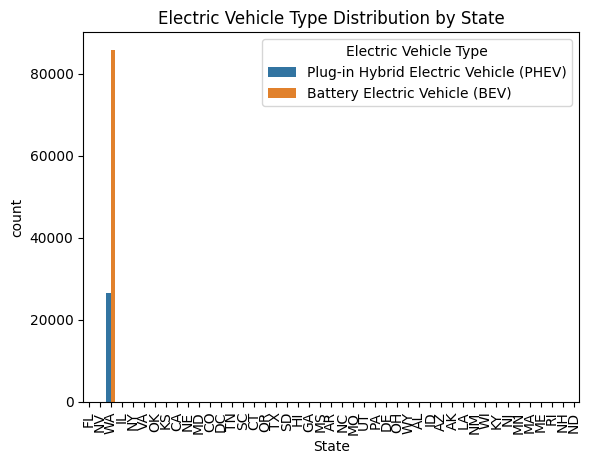

In [ ]:
# Grouped bar plot for Electric Vehicle Type by State
sns.countplot(x='State', hue='Electric Vehicle Type', data=df)
plt.title('Electric Vehicle Type Distribution by State')
plt.xticks(rotation=90)
plt.show()


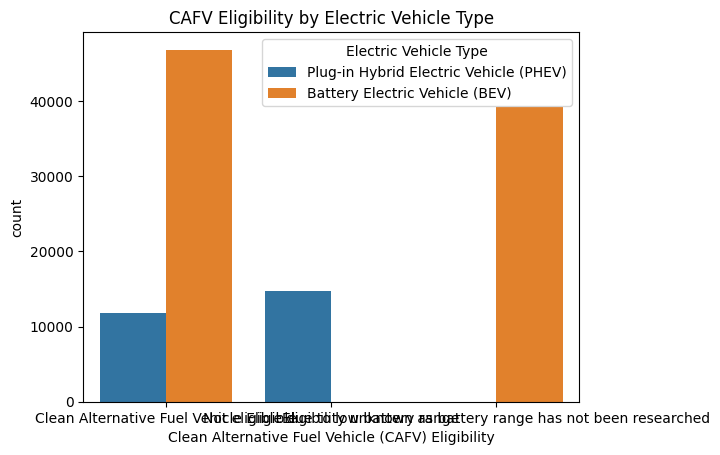

In [ ]:
# Grouped bar plot for CAFV Eligibility by Electric Vehicle Type
sns.countplot(x='Clean Alternative Fuel Vehicle (CAFV) Eligibility', hue='Electric Vehicle Type', data=df)
plt.title('CAFV Eligibility by Electric Vehicle Type')
plt.show()


Task 2: Create a Choropleth using plotly.express to display the number of EV vehicles based on location

In [24]:
pip install plotly

In [20]:
nyc = pd.read_csv('/content/dataset.csv')

In [21]:
import plotly.express as px

In [25]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/dataset.csv')

# Group by 'State' to count the number of EVs in each state
ev_count_by_state = df.groupby('State').size().reset_index(name='EV_Count')

# Preview the result
print(ev_count_by_state)


   State  EV_Count
0     AK         1
1     AL         1
2     AR         4
3     AZ         6
4     CA        76
5     CO         9
6     CT         6
7     DC         6
8     DE         1
9     FL         6
10    GA         7
11    HI         4
12    ID         2
13    IL         6
14    KS         3
15    KY         1
16    LA         3
17    MA         3
18    MD        26
19    ME         1
20    MN         1
21    MO         3
22    MS         1
23    NC         7
24    ND         1
25    NE         5
26    NH         2
27    NJ         3
28    NM         1
29    NV         8
30    NY         4
31    OH         2
32    OK         1
33    OR         5
34    PA         3
35    RI         1
36    SC         5
37    SD         1
38    TN         3
39    TX        14
40    UT         4
41    VA        36
42    WA    112348
43    WI         1
44    WY         2


In [26]:
import plotly.express as px

# Create the choropleth map
fig = px.choropleth(
    ev_count_by_state,  # DataFrame containing the state and EV count
    locations='State',  # Column with the state codes
    locationmode="USA-states",  # Indicating that it's a US state map
    color='EV_Count',  # Column that defines the color intensity
    hover_name='State',  # Column to appear in the hover tooltip
    color_continuous_scale='Viridis',  # Color scale for the map
    scope="usa"  # Limit the scope to the USA
)

# Update the layout
fig.update_layout(
    title_text='Electric Vehicles Distribution by State',
    geo=dict(
        lakecolor='rgb(255, 255, 255)',
    )
)

# Display the map
fig.show()


Task 3: Create a Racing Bar Plot to display the animation of EV Make and its count each year.

In [27]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/dataset.csv')

# Group by 'Model Year' and 'Make' to count the number of vehicles per make per year
make_year_counts = df.groupby(['Model Year', 'Make']).size().reset_index(name='Count')

# Preview the result
print(make_year_counts.head())


   Model Year       Make  Count
0        1997  CHEVROLET      1
1        1998       FORD      1
2        1999       FORD      3
3        2000       FORD     10
4        2002     TOYOTA      2


In [28]:
import plotly.express as px

# Create the animated bar plot
fig = px.bar(
    make_year_counts,                # DataFrame with year, make, and count
    x='Count',                       # The count of vehicles (bar length)
    y='Make',                        # The car brands (y-axis)
    color='Make',                    # Color by the car brand
    animation_frame='Model Year',    # Create animation based on the model year
    orientation='h',                 # Horizontal bars
    title='EV Make Count Animation Over the Years',
    labels={'Count': 'Number of EVs', 'Make': 'Car Brand'},  # Axis labels
    range_x=[0, make_year_counts['Count'].max() + 100]  # Range for the x-axis (count)
)

# Update the layout for better visualization
fig.update_layout(
    xaxis_title='Number of Electric Vehicles',
    yaxis_title='Electric Vehicle Make',
    showlegend=False,  # Hide the legend for better clarity
    template='plotly_dark',  # Use a dark theme
    title_font_size=24
)

# Display the animated plot
fig.show()
